In [36]:
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
from scipy.optimize import root

We first implement the functions $\varphi(m;\mathbf{x}_n)$ and $\varphi'(m;\mathbf{x}_n)$, which will be useful to compute the MLE. In these functions, the argument `Sample` is an array which is supposed to contain the sample $\mathbf{X}_n$.

In [37]:
# Defining the phi function
def phi(m, sample):
    return 1/m + np.mean(np.log(sample) * (1 - sample**m))

# Defining the derivative of the phi function
def phi_deriv(m, sample):
    return -1/m**2 - np.mean((np.log(sample))**2 * sample**m)

Complete the following code so that the command `Estim(Sample)` returns an estimation of $\hat{m}_n$. You may choose any of your favourite method!

In [38]:
def Estim_m(sample):
    sol_m = root(lambda m: phi(m, sample), x0=3)
    return sol_m.x[0]

# Test of the function
true_m = 3
n_sample = 10**4  # Size of the sample
sample = weibull_min.rvs(true_m, size=n_sample)  # Generate Weibull sample

# Estimate m
estimated_m = Estim_m(sample)
print(f"Estimated m: {estimated_m}")

Estimated m: 2.971394756771495


To observe consistency, we plot $\hat{m}_n$ as a function of $n$, and add a horizontal line with height the true value of $m$.

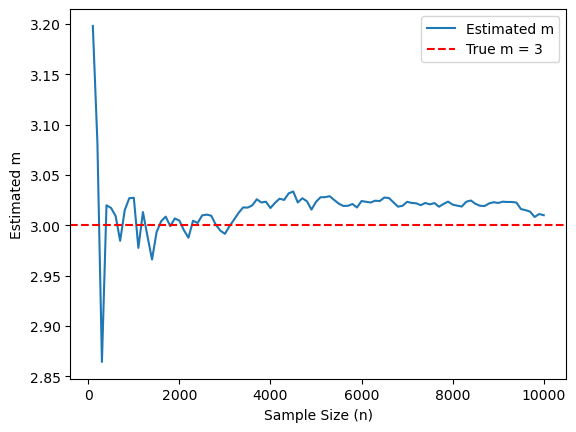

In [39]:
# Now to simulate the varying sample sizes and plot
n_points = 100  # Number of values of n for which we compute m_hat_n
step = 100      # Step between two consecutive values of n for which we compute m_hat_n
n_sample = step * n_points  # Total size of the sample

whole_sample = weibull_min.rvs(true_m, size=n_sample)  # Generate the whole sample

# Vector to store the estimates of m
vect_of_hat_m = []

# Loop to compute m_hat_n for each partial sample
for i in range(1, n_points + 1):
    current_n = step * i
    partial_sample = whole_sample[:current_n]
    vect_of_hat_m.append(Estim_m(partial_sample))

# Plot the results
nn = np.arange(step, step * n_points + 1, step)
plt.plot(nn, vect_of_hat_m, label="Estimated m")
plt.axhline(y=true_m, color='red', linestyle='--', label=f"True m = {true_m}")
plt.xlabel("Sample Size (n)")
plt.ylabel("Estimated m")
plt.legend()
plt.show()